In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [9]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [10]:
X

array([[ 4.36126636, -4.0724696 ],
       [ 5.70537175, -5.4065206 ],
       [ 5.29593223, -3.27764896],
       ...,
       [ 2.33935212, -5.6204066 ],
       [ 3.86541783, -3.78589894],
       [-9.2838481 , -6.87811771]])

In [11]:
y

array([2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2,
       1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2,
       0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2,
       1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1,
       2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2,

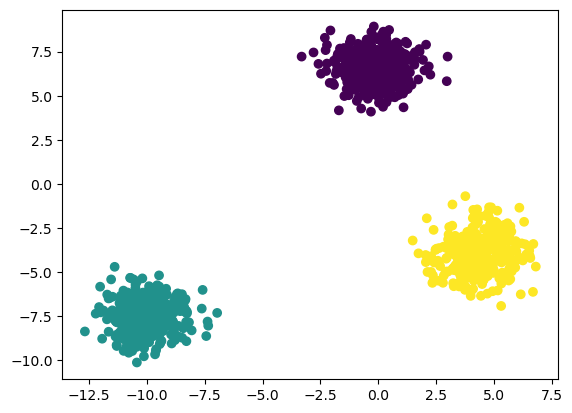

In [15]:
plt.scatter(X[:,0],X[:,1],c=y)

In [16]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [21]:
from sklearn.cluster import KMeans

In [22]:
## Elbow method to select k value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\dell\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dell\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dell\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dell\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

In [23]:
wcss

[1340.0000000000007,
 440.57065793427597,
 33.80615193275329,
 28.925407353038576,
 25.932482259251337,
 22.608657431977367,
 18.882519819276247,
 16.411812822855072,
 15.225143876189879,
 13.671794246389293]

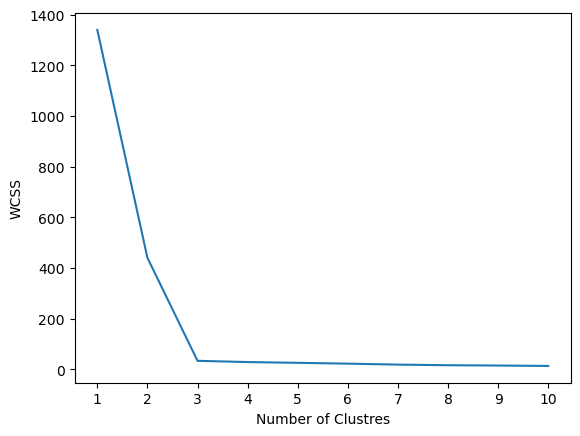

In [24]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustres")
plt.ylabel("WCSS")
plt.show()


In [29]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [30]:
kmeans.fit_predict(X_train_scaled)

c:\Users\dell\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1,
       1, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2,
       2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1,
       2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2,
       0, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0,
       1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2,
       1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 2, 1,

In [31]:
y_pred=kmeans.predict(X_test_scaled)

In [32]:
y_pred

array([2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 0,
       0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0,
       0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1,
       1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2,
       2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2,
       0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2,
       0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0,
       0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0,
       0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2,

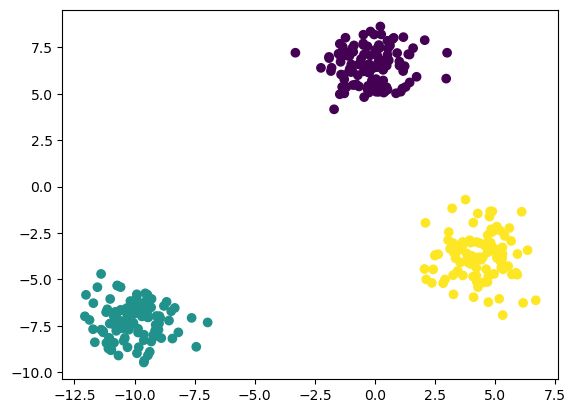

In [33]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [34]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [35]:
## kneelocator
!pip install kneed

In [36]:
from kneed import KneeLocator

In [37]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [38]:
kl.elbow

np.int64(3)

In [39]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [40]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\dell\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dell\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dell\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dell\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

In [41]:
silhouette_coefficients

[np.float64(0.683087608725735),
 np.float64(0.8615590216432788),
 np.float64(0.6909513482010485),
 np.float64(0.5137204362597444),
 np.float64(0.5159973870663956),
 np.float64(0.3433635954870613),
 np.float64(0.3501430300031912),
 np.float64(0.32669037097410736),
 np.float64(0.3515724314964696)]

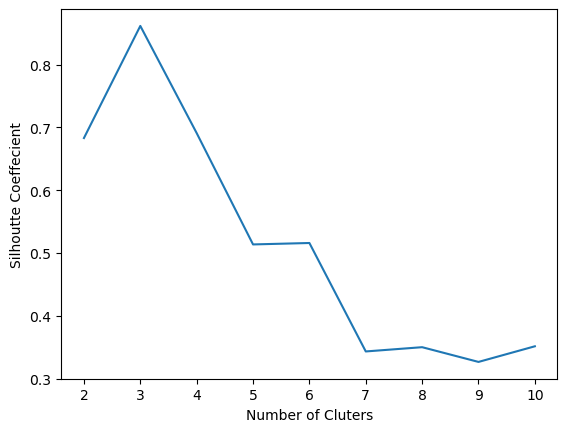

In [42]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()